In [1]:
'''!pip install tensorflow --upgrade
!pip install tensorflow-probability --upgrade
!pip install tf-keras --upgrade
!pip install scikit-image --upgrade
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents
!pip install pyglet
!pip install pandas pandas-ta numpy'''

"!pip install tensorflow --upgrade\n!pip install tensorflow-probability --upgrade\n!pip install tf-keras --upgrade\n!pip install scikit-image --upgrade\n!pip install 'imageio==2.4.0'\n!pip install pyvirtualdisplay\n!pip install tf-agents\n!pip install pyglet\n!pip install pandas pandas-ta numpy"

In [1]:
import os
# Keep using keras-2 (tf-keras) rather than keras-3 (keras).
os.environ['TF_USE_LEGACY_KERAS'] = '1'

from envs.moving_average_env import MovingAverageEnv
from envs.rsi_env import RsiEnv
from envs.macd_env import MacdEnv
from utils import load_dataset

from tf_agents.environments import tf_py_environment
from tf_agents.policies import random_tf_policy
import matplotlib.pyplot as plt

In [172]:
df = load_dataset('./resources/BABA.csv')
#env = MovingAverageEnv(df=df, window_size=10, frame_bound=(2000, 2300))
#env = RsiEnv(df=df, window_size=10, frame_bound=(2000, 2300))
env = MacdEnv(df=df, window_size=10, frame_bound=(2300, 2670))

In [3]:
df.iloc[0:5]

,Close,Volume,Open,High,Low
0,17.5033,64564048,17.2127,17.5787,17.2127
1,17.4493,57188086,17.6653,17.7000,17.4440
2,17.5500,44757428,17.5667,17.6160,17.3527
3,17.5907,42654699,17.4593,17.6320,17.4427
4,17.9800,96542592,17.9133,18.1333,17.8340


In [4]:
env.time_step_spec()

TimeStep(
{'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type'),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(30,), dtype=dtype('float32'), name='observation', minimum=[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.], maximum=[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5.])})

In [5]:
env.prices[0:5]

array([14.6207, 14.006 , 14.0853, 14.0633, 14.041 ], dtype=float32)

In [6]:
env.signal_features

array([[-0.10796841, -0.05111289, -0.13024333],
       [-0.11573195, -0.06177871, -0.12734106],
       [-0.12018183, -0.06766043, -0.12590921],
       ...,
       [ 1.1253064 , -1.0221559 ,  2.0740743 ],
       [ 0.8731602 , -1.0341191 ,  1.8338915 ],
       [ 0.80187994, -0.89899707,  1.6274892 ]], dtype=float32)

In [173]:
eval_env = tf_py_environment.TFPyEnvironment(env)

In [174]:
random_policy = random_tf_policy.RandomTFPolicy(eval_env.time_step_spec(),
                                                eval_env.action_spec())

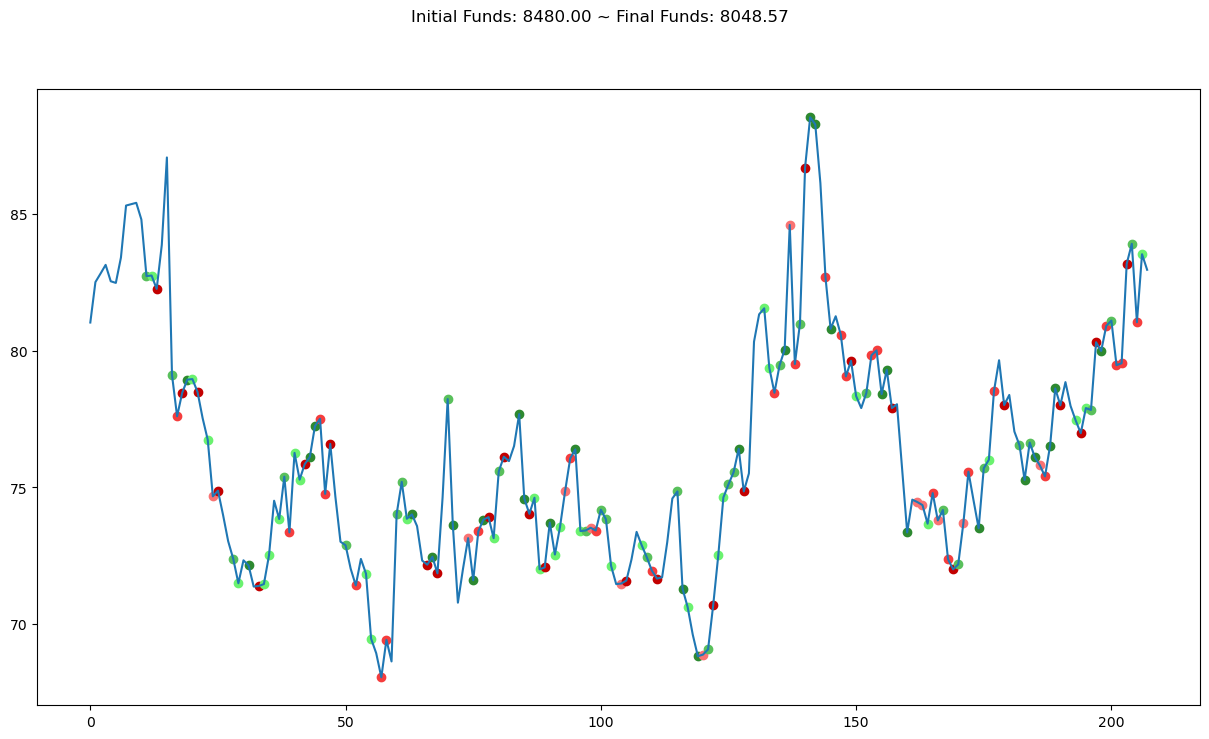

In [175]:
def render_policy_eval2(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        #print(time_step.observation)
    env.render('human')
    env.save_render('luqui_test')

def render_policy_eval(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
    plt.figure(figsize=(15, 8))
    env.save_render(filename)
    
render_policy_eval(random_policy, './evals/test_env.jpg')

In [10]:
time_step = eval_env.reset()
while not time_step.is_last():
    action_step = random_policy.action(time_step)
    time_step = eval_env.step(action_step.action)
    #print(time_step)